In [76]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [77]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [78]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [79]:
%matplotlib inline

In [80]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(17646, 28)
(17646, 8)


# Multivariate Linear Regression (Foot prediction)

In [81]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_acc[:, 23] == 1)[0]
X_relative_footsteps_acc_RL_swing = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_swing = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [83]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.04003644, -0.06632428,
        0.05440154,  0.00439207,  0.02899047,  0.02653936,  0.22664036,
        0.18001143, -0.4086564 ,  0.23994108, -0.16991884, -0.40835668,
       -0.2385218 ,  0.16382314, -0.41169444, -0.25160387, -0.15317046,
       -0.41252498,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [84]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.04003644, -0.06632428,
        0.05440154,  0.00439207,  0.02899047,  0.02653936,  0.22664036,
        0.18001143, -0.4086564 ,  0.23994108, -0.16991884, -0.40835668,
       -0.2385218 ,  0.16382314, -0.41169444, -0.25160387, -0.15317046,
       -0.41252498,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

### Linear Regression

In [110]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.7335909608353152
RMSE:  0.008456120769023434
The lowest error is:  3.371972815996438e-06
The highest error is:  0.041392711144305705
The avg. error is:  0.005890316573302262


In [113]:
model_rl_relative_swinging_x.coef_

array([[-7.52284924e-02, -3.98099534e-02, -8.39012158e-03,
        -5.42908601e-02,  9.06821068e-03, -5.40644672e-05,
        -1.03608337e-01,  1.09548239e-01, -5.64605278e-01,
         3.15282372e-01,  1.24543335e+00,  8.49095745e-03,
        -2.33013046e-01, -1.12417497e-01]])

In [111]:
model_rl_relative_swinging_x.intercept_

array([0.17553432])

Text(0, 0.5, 'Predictions')

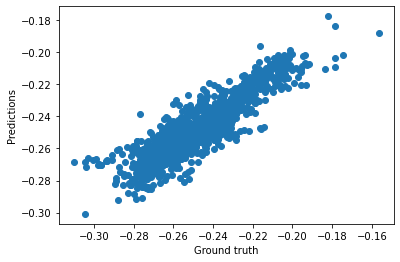

In [112]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [46]:
#%store model_rl_relative_swinging_x

In [47]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [48]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [168]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.7202319851475043
RMSE:  0.011531261620178857
The lowest error is:  2.704503014566706e-06
The highest error is:  0.0595744426978599
The avg. error is:  0.007881397425813128


In [171]:
model_rl_relative_swinging_y.coef_

array([[-0.0503605 , -0.10136979, -0.0579076 ,  0.01411304, -0.04092923,
        -0.09116674,  0.17997489, -0.09777596, -0.2490051 , -0.2979825 ,
         0.54298928,  1.05386997, -0.31220931, -0.27968325]])

In [172]:
model_rl_relative_swinging_y.intercept_

array([-0.01789602])

Text(0, 0.5, 'Predictions')

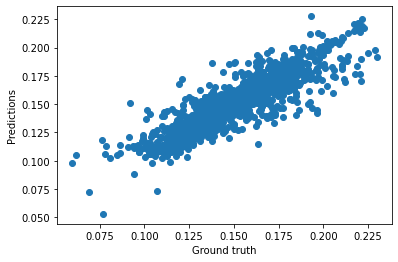

In [170]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [73]:
#%store model_rl_relative_swinging_y

In [74]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [75]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")